## Exercise 1
given the following un-normalized posterior distribution 

$ g(\theta|x) \propto \frac{1}{2} \exp\left(-\frac{(\theta + 3)^2}{2}\right) + \frac{1}{2} \exp\left(-\frac{(\theta - 3)^2}{2}\right) $

Please note that LaTeX is a typesetting language commonly used for mathematical expressions. It provides a more standardized and visually appealing representation of mathematical equations. <br>
a) draw a Markov Chain from the posterior distribution using a Metropolis-Hastings algorithm <br>
b) use a Norm (0, 1) as random-walk candidate density<br>
c) plot the sampled distribution<br>
d) analyze the chain with the CODA package and plot the chain autocorrelation<br>
e) try to use different burn-in cycles and thinning and plot the corresponding posterior distribution<br>
and the chain autocorrelation function. What are the best parameters ?<br>

a) I draw a Markov Chain from the g function using a Metropolis-Hastings algorithm. For each iteration in the algorithm, a new proposed value for theta is generated using a normal distribution with mean theta.cur and standard deviation sigma.
The Metropolis ratio is calculated as the base 10 logarithm of the ratio between the probability density at the new proposed point (func.Prop) and the probability density at the current point (func.Cur).
The Metropolis ratio is then compared to a random value drawn from a uniform distribution between 0 and 1. If the Metropolis ratio is greater than or equal to 0 or greater than the base 10 logarithm of the randomly drawn value, the new proposed point is accepted as the new current point; otherwise, the current point is retained.

In [1]:
#define the prior function
g <- function(theta) {
    return(0.5 * exp(-((theta + 3)^2) / 2) + 0.5 * exp(-((theta - 3)^2) / 2))
}

# gets the log10 of g function
g.metropolis <- function (theta) {
return (log10(g(theta)))
}

#define the sampling MCMC function 
metropolis_1dim <- function (func , theta.init , n.sample , sigma) {
    
    #define initial values of the theta, g(theta)
    theta.cur <- theta.init
    func.Cur <- func(theta.cur)
    func.Samp <- matrix (data=NA , nrow=n.sample , ncol=2+1)
    n.accept <- 0
    rate.accept <- 0.0
    
    for (n in 1:n.sample ) {
        theta.prop <- rnorm(n=1, mean = theta.cur , sigma ) # proposed value for theta
        func.Prop <- func(theta.prop)                                           
        logMR <- func.Prop - func.Cur                                          # Log10 of the Metropolis ratio
        if ( logMR >=0 || logMR >log10( runif (1)) ) {
            theta.cur <- theta.prop
            func.Cur <- func.Prop
            n.accept <- n.accept + 1
        }
func.Samp[n, 1] <- func.Cur
func.Samp[n, 2] <- theta.cur
}
return (func.Samp)
}

In [2]:
#set simulation parameters
theta.init <- -20
sample.sig <- 10
n.sample <- 10^6

#run the MCMC simulation
set.seed(20190513)
chain <- metropolis_1dim(func= g.metropolis , theta.init = theta.init ,
                                                   n.sample = n.sample , sigma = sample.sig**2)

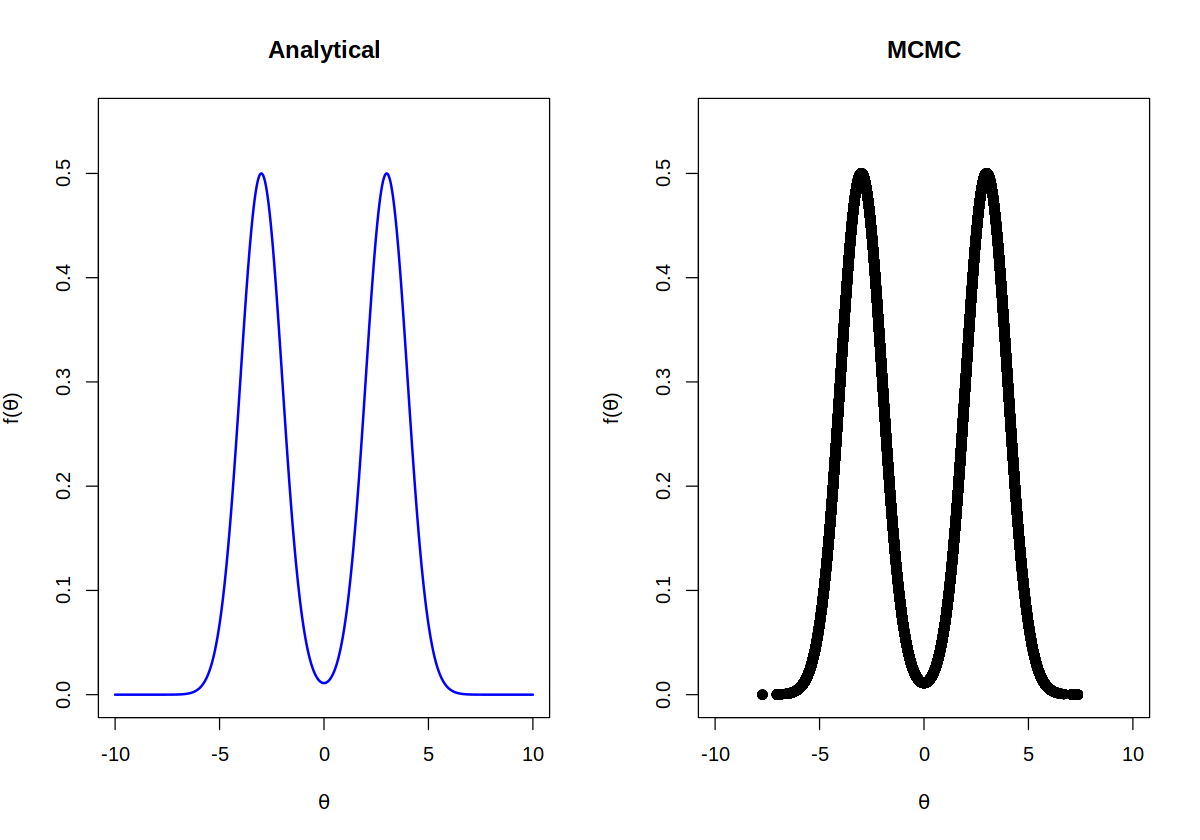

In [12]:
#plot the g function
par( mfrow=c(1,2))
options(repr.plot.width = 10, repr.plot.height = 7)
x <- seq(-10, 10, length.out=10**4)
y <- g(x)
ymax <- 1.05 * max(y)
plot(x, y, ylim=c(0,max(y)*1.10), type='l', lwd=2, col='blue', main='Analytical', xlab= expression(theta), ylab = expression( paste ('f(',theta ,')', sep='')))

#plot the sampled points from g
Y <- chain[, 1]
X <- chain[, 2]
plot(X, 10**Y, type='p', pch=19, col='black', xlim=c(-10,10), ylim=c(0,max(y)*1.10), main='MCMC', xlab= expression(theta), ylab = expression( paste ('f(',theta ,')', sep='')))